In [ ]:
#top 15 countries by average Co2 emissions per capita

In [4]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# Show column names
columns = pd.read_sql_query("SELECT * FROM Environmental_Indicators LIMIT 1;", conn)
print(columns.columns.tolist())


['Country Name', 'Country Code', 'Time', 'Time Code', 'Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990) [EN.GHG.CO2.ZG.AR5]', 'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]', 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]', 'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]', 'Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]', 'Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]', 'Forest area (sq. km) [AG.LND.FRST.K2]']


C:\Users\krish\AppData\Local\Temp\ipykernel_44064\591182004.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15, x='CO2_per_capita', y='Country Name', palette='crest')


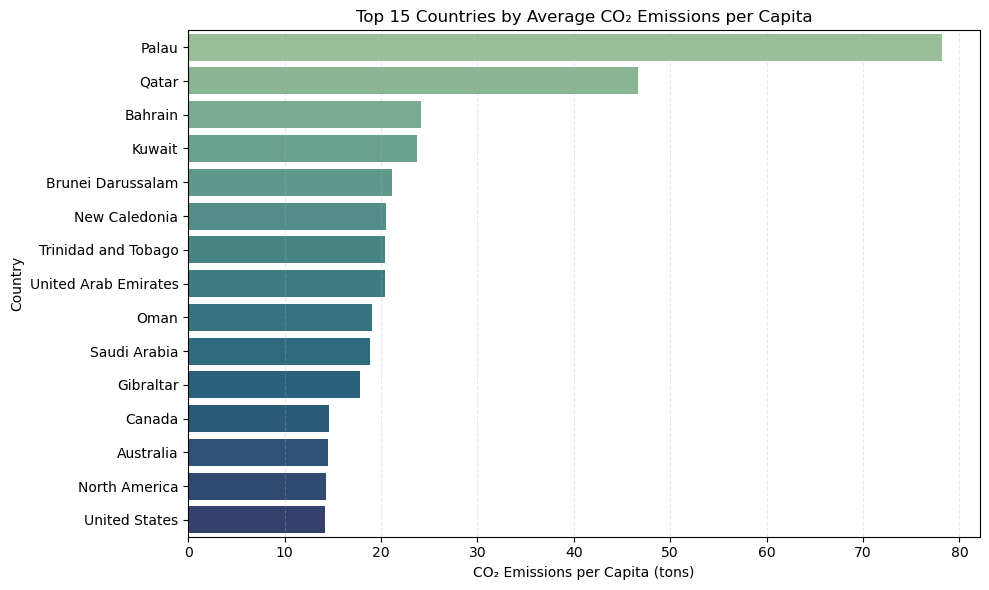

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# Query and load data
query = """
SELECT "Country Name", 
       "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]" AS CO2_per_capita
FROM Environmental_Indicators
WHERE "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]" IS NOT NULL
"""

df = pd.read_sql_query(query, conn)

# Convert CO₂ emissions to numeric
df['CO2_per_capita'] = pd.to_numeric(df['CO2_per_capita'], errors='coerce')
df = df.dropna(subset=['CO2_per_capita'])

# Group by country and calculate average
df_grouped = df.groupby('Country Name')['CO2_per_capita'].mean().reset_index()

# Sort and select top 15
top15 = df_grouped.sort_values(by='CO2_per_capita', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top15, x='CO2_per_capita', y='Country Name', palette='crest')
plt.title("Top 15 Countries by Average CO₂ Emissions per Capita")
plt.xlabel("CO₂ Emissions per Capita (tons)")
plt.ylabel("Country")
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
